<a href="https://colab.research.google.com/github/algo-ryth-nic/google-colab-notebooks/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals for this project:
- Handling Image Data
- Image Compression
- Multi-class classifiers
- Tuning Hyperparameters
- Dealing with curse of dimensionality  
- Visualizing and applying PCA technique
- trying to grasp the power of classification algorithms
- binary classification classifier into a multi-class classifier using ova strategy  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MNIST (Modified-National Institute of Standards and Technology ) Dataset
This is a set of 70,000 images (subset of the larger nist dataset) of digits handwritten by high school students and employees of the US Cen‐
sus Bureau. 

Each image is `28 x 28` pixels wide, thus a total of `784` pixels, in this case features. Each instance of each feature represents it's pixel's intensity ranging from 0 (white) - 255 (black)

MNIST is already split into training & testing data. The first 60k are for training while the remaining 10k are for testing. 

## Downloading Dataset from offical repo
using `from sklearn.datasets.fetch_openml`

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, return_X_y = True)

In [ ]:
# predictors and target label (Multi-Class/Multi-nomial)
X,y = mnist
print(X,y, sep='\n')

       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
69995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69997     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69998     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69999     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0

[70

In [ ]:
import pandas as pd
import numpy as np

# converting it to a DataFrame
X = pd.DataFrame(mnist[0])
X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(70000, 784)

In [ ]:
# Data is cleaned, no null values either. 
np.argmax(X.isna().sum())

0

## Visualizing the digits

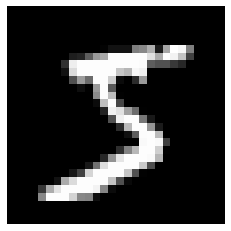

5


In [ ]:
import matplotlib.pyplot as plt

digit = X.iloc[0].to_numpy().reshape(28,28)
plt.imshow(digit, cmap='binary_r', interpolation='antialiased')
plt.axis('off')
plt.show();

print(y[0])

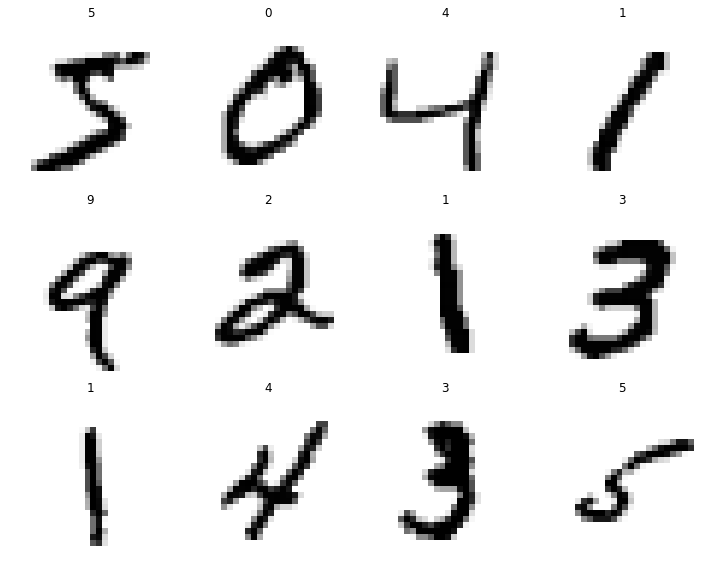

In [ ]:
# displaying first 16 entries
fig, ax = plt.subplots(3,4, figsize=(10,8))
i = 0 
for row in ax:
  for axis in row:
    digit = X.iloc[i].to_numpy().reshape(28,28)
    axis.imshow(digit, cmap='binary', interpolation=None)
    axis.axis('off')
    axis.set_title(y[i])
    i+=1

plt.tight_layout()

In [ ]:
def display_digit_img(image_data_vector, label, c='BuPu'):
  digit = image_data_vector.reshape(28, 28)
  plt.imshow(digit, cmap=c, interpolation='antialiased')
  plt.axis('off')
  print(f'Label : {label}')
  plt.show();

def plot_image_matrix(shape, image_data, label_vector, c='BuPu', size=(5,5)):
  fig, ax = plt.subplots(*shape, figsize=size)
  i = 0 
  for row in ax:
    for axis in row:
      if len(label_vector) <= i:
        break
      digit = image_data.iloc[i].to_numpy().reshape(28,28)
      axis.imshow(digit, cmap=c, interpolation=None)
      axis.axis('off')
      axis.set_title(label_vector[i])
      i+=1

  plt.tight_layout()

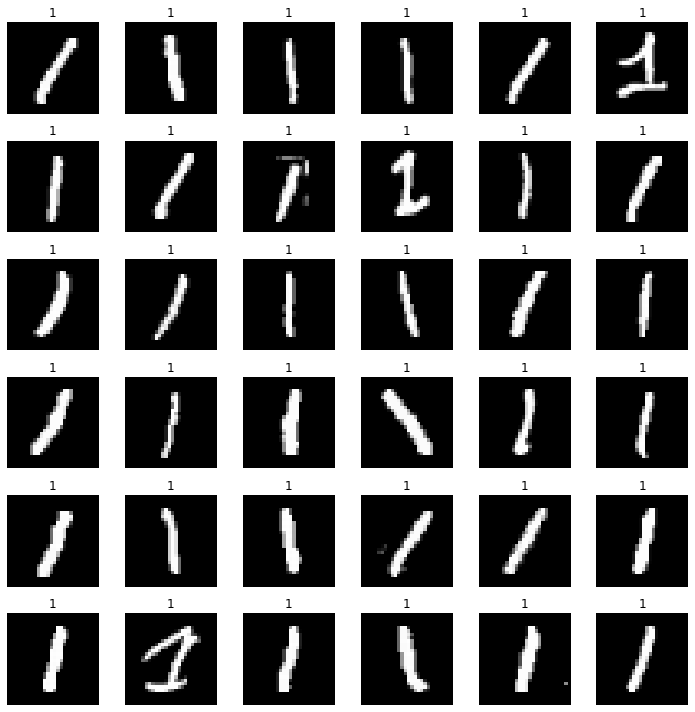

In [ ]:
def display_digit_n(n, rc=(6,6), fig_size=(10,10)):
  digit_n = X[y == str(n)]
  plot_image_matrix(rc, digit_n, [str(n) for _ in range(rc[0]*rc[1])], c='binary_r', size=fig_size)

display_digit_n(1)

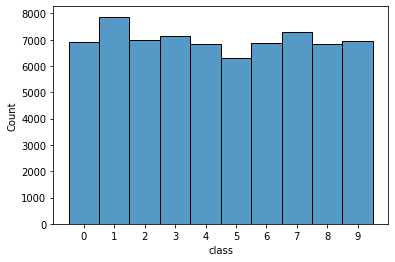

In [ ]:
# Distribution of digits
sns.histplot(data=y);

## Model Training

In [ ]:
import sklearn.metrics as skm
def evaluate(x, y_true, model):
  y_pred = model.predict(x)
  sns.heatmap(skm.confusion_matrix(y_true, y_pred), cmap='jet_r', annot=True, fmt='d');
  plt.show();
  # average: 'micro' -> return the total ratio of tp/(tp+fp)
  # average: 'none' -> precision for each class
  print(f"Precision : {skm.precision_score(y_true, y_pred, average='micro'):.2%}")
  print(f"Recall : {skm.recall_score(y_true, y_pred, average='micro'):.2%}")
  print(f"f1 : {skm.f1_score(y_true, y_pred, average='micro'):.2%}")
  print('\n',skm.classification_report(y_true,y_pred))

Splitting into Training and Testing Data

In [ ]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f'Shape of X_train & X_test: {X_train.shape} | {X_test.shape}')
print(f'Shape of y_train & y_test: {y_train.shape} | {y_test.shape}')

Shape of X_train & X_test: (60000, 784) | (10000, 784)
Shape of y_train & y_test: (60000,) | (10000,)


### Logistic Regression

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
# solver 'saga': Multiclass + faster on large datasets
# chances of overfitting as no. of features are a lot compared to instances
# penalty: 'l1', C=0.01 to minimize 
lr = LogisticRegression(C=0.01, penalty="l1", solver="saga")
lr.fit(X_train[:5000], y_train[:5000])

y_pred = lr.predict(X_test[:5000])
y_pred

In [ ]:
print(f'Score: {lr.score(X_test, y_test):.2%}')

Score: 89.20%


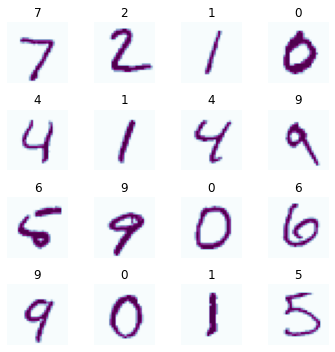

In [ ]:
plot_image_matrix((4,4), X_test, y_pred)

#### Model Evaluation

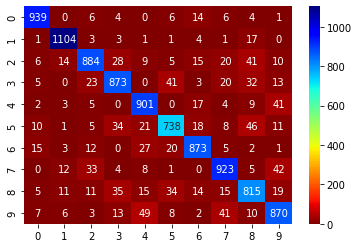

Precision : 89.20%
Recall : 89.20%
f1 : 89.20%

               precision    recall  f1-score   support

           0       0.95      0.96      0.95       980
           1       0.96      0.97      0.96      1135
           2       0.90      0.86      0.88      1032
           3       0.88      0.86      0.87      1010
           4       0.87      0.92      0.90       982
           5       0.86      0.83      0.85       892
           6       0.91      0.91      0.91       958
           7       0.88      0.90      0.89      1028
           8       0.83      0.84      0.83       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
evaluate(X_test, y_test, model=lr)

In [ ]:
display_digit_img

#### Round 2 LR

the default optimization algorithm parameter was `solver = liblinear` and it took 2893.1 seconds to run with a accuracy of 91.45%. When I set `solver = lbfgs`, it took 52.86 seconds to run with an accuracy of 91.3%. Changing the solver had a minor effect on accuracy, but at least it was a lot faster.

In [ ]:
%%time
lr_ovr = LogisticRegression(multi_class= 'ovr', solver='saga', penalty='l1')
lr_ovr.fit(X_train[:10000], y_train[:10000])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

CPU times: user 1min 49s, sys: 85.6 ms, total: 1min 49s
Wall time: 1min 48s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
print(f'Score: {lr.score(X_test, y_test):.2%}')

Score: 89.20%


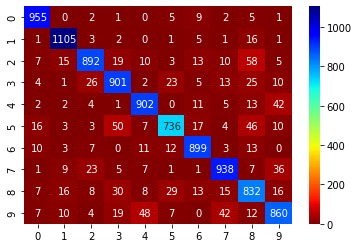

Precision : 90.20%
Recall : 90.20%
f1 : 90.20%

               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.97      0.96      1135
           2       0.92      0.86      0.89      1032
           3       0.88      0.89      0.88      1010
           4       0.91      0.92      0.91       982
           5       0.90      0.83      0.86       892
           6       0.92      0.94      0.93       958
           7       0.91      0.91      0.91      1028
           8       0.81      0.85      0.83       974
           9       0.88      0.85      0.86      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
evaluate(X_test, y_test, model=lr_ovr)

#### Round 3 LR

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['saga', 'lbfgs']
penalty = ['l1', 'l2']
c_values = [1.0, 0.1, 0.01]

hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)

model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=model, param_grid= hyperparameters, cv=cv, n_jobs=-1, scoring='accuracy', error_score=0)
search_result = clf.fit(X_train[:5000], y_train[:5000])

print(f"Best: {search_result.best_score_} using {search_result.best_params_}")

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_test, y_test)

0.8365

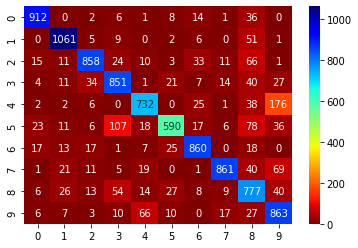

Precision : 83.65%
Recall : 83.65%
f1 : 83.65%

               precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.75      0.79       982
           5       0.86      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.94      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.86      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
evaluate(X_test, y_test, mnb)

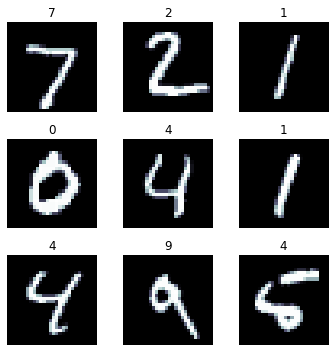

In [ ]:
y_pred = mnb.predict(X_test)
plot_image_matrix((3,3), X_test, y_pred, c='bone')

Label : 0


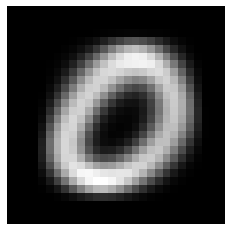

In [ ]:
# extracts the log probability of each feature (pixel). `np.exp` converts this back into a probability.
display_digit_img(np.exp(mnb.feature_log_prob_[0]), '0', c='binary_r')

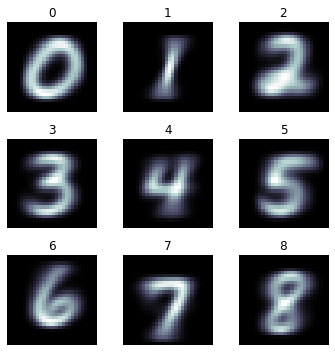

In [ ]:
# visualizing what the model has learned by plotting the probability of each pixel for each class
plot_image_matrix((3,3), pd.DataFrame([np.exp(mnb.feature_log_prob_[i]) for i in range(10)]), [str(i) for i in range(10)], c='bone')

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9705

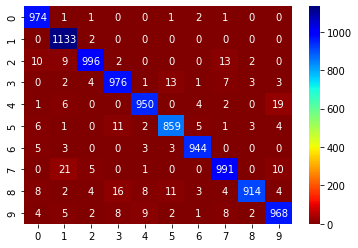

Precision : 97.05%
Recall : 97.05%
f1 : 97.05%

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
evaluate(X_test, y_test, knn_clf)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test) 

0.877

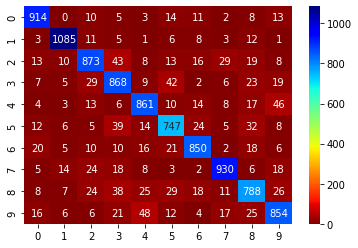

Precision : 87.70%
Recall : 87.70%
f1 : 87.70%

               precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.87      0.85      0.86      1032
           3       0.82      0.86      0.84      1010
           4       0.87      0.88      0.87       982
           5       0.83      0.84      0.84       892
           6       0.90      0.89      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.83      0.81      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
evaluate(X_test, y_test, dt_clf)

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9692

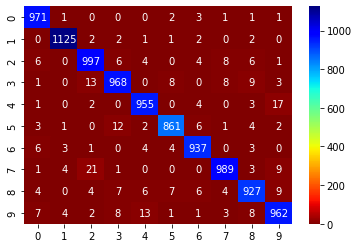

Precision : 96.92%
Recall : 96.92%
f1 : 96.92%

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
evaluate(X_test, y_test, rf_clf)

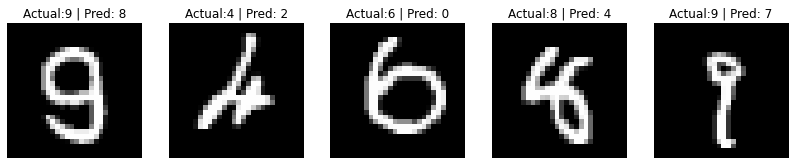

In [ ]:
# display some of the incorrect predictions
y_pred = rf_clf.predict(X_test)
index = 0
misclassifiedIndicies = []
for actual_label, pred in zip(y_test, y_pred):
  if actual_label != pred:
    misclassifiedIndicies.append(index)
  index+=1

to_show= 5
fig, ax = plt.subplots(1,to_show, figsize=(14,4))
for i,axis in enumerate(ax):
  digit = X_test.iloc[misclassifiedIndicies[i]].to_numpy().reshape(28,28)
  axis.imshow(digit, cmap='binary_r', interpolation=None)
  axis.axis('off')
  axis.set_title(f'Actual:{y_test[misclassifiedIndicies[i] + 60000]} | Pred: {y_pred[misclassifiedIndicies[i]]}')

## How can we improve our scores?
1. Is to reduce the dimensions thus eliminating noise 
2. values are from 0-255, we can fix this to 0-1 range since color is irrelevant 
3. Drop Pixels on the image border.
4. faster training speeds

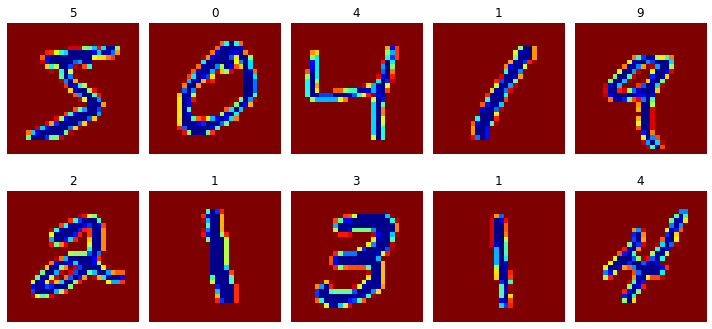

In [ ]:
plot_image_matrix((2,5), X, y, c='jet_r', size=(10,5))

## Apply PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def do_pca(pc, data):
  X = StandardScaler().fit_transform(data)
  pca = PCA(pc)
  X_pca = pca.fit_transform(X)
  return pca, X_pca

In [ ]:
pca, X_train_pca = do_pca(2, X_train)

In [ ]:
X_train_pca.shape

(60000, 2)

Accuracy: 33.31%


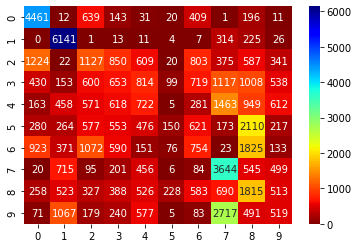

Precision : 33.31%
Recall : 33.31%
f1 : 33.31%

               precision    recall  f1-score   support

           0       0.57      0.75      0.65      5923
           1       0.63      0.91      0.75      6742
           2       0.22      0.19      0.20      5958
           3       0.15      0.11      0.13      6131
           4       0.17      0.12      0.14      5842
           5       0.24      0.03      0.05      5421
           6       0.17      0.13      0.15      5918
           7       0.35      0.58      0.43      6265
           8       0.19      0.31      0.23      5851
           9       0.15      0.09      0.11      5949

    accuracy                           0.33     60000
   macro avg       0.28      0.32      0.28     60000
weighted avg       0.29      0.33      0.29     60000

CPU times: user 11.1 s, sys: 5.24 s, total: 16.3 s
Wall time: 10.5 s


In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver ='lbfgs')
lr.fit(X_train_pca, y_train)
print(f'Accuracy: {lr.score(X_train_pca, y_train):.2%}')
evaluate(X_train_pca, y_train, lr)

In [ ]:
print(pca.explained_variance_ratio_)
print(f'Total Variance Captured: {sum(pca.explained_variance_ratio_):.2%}')

[0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427
 0.01923344 0.01745799 0.01535092 0.0140172  0.01341743 0.01203742
 0.0111457  0.01089924 0.01028649 0.00994487 0.00936383 0.00921046
 0.00893437 0.00869913 0.00827363 0.00803417 0.00764845 0.00741772
 0.00715292 0.00691846 0.00684136 0.00656673 0.00631676 0.00612918
 0.00596253 0.00587715 0.0057159  0.00562306 0.00554678 0.00538416
 0.00531179 0.00519601 0.00508208 0.00479992 0.00476442 0.00469129
 0.00454337 0.00451333 0.00446951 0.00443369 0.00438202 0.00430369
 0.00426863 0.00423605 0.00404679 0.00399405 0.00397431 0.00393801
 0.00385787 0.00379016 0.00375317 0.00370703 0.00364877 0.00359249
 0.00352303 0.00347737 0.00344325 0.00339785 0.00335894 0.00334763
 0.00331729 0.00322945 0.0031605  0.00313006 0.00310388 0.00307024
 0.00304756 0.00302542 0.00299184 0.00297492 0.00294752 0.00290108
 0.00286588 0.00285384 0.00282649 0.00282112 0.00279039 0.00278859
 0.00278005 0.00277058 0.0027544  0.00273623 0.00270836 0.00268

In [ ]:
pca.components_.shape

(2, 784)

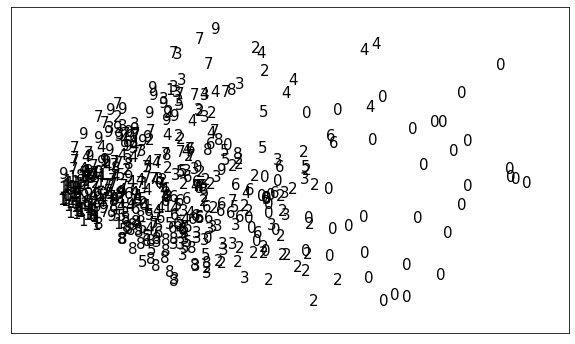

In [ ]:
# from matplotlib import cm
# jet = cm = plt.get_cmap('jet') 
def plot_components(X,y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                #  color= jet, 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
plot_components(X_pca[:500], y[:500])

In [ ]:
pca_best = PCA(0.95)
best_X_train_pca = pca_best.fit(X_train, y_train)
len(best_X_train_pca.components_)

154

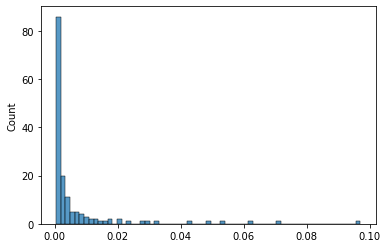

In [ ]:
sns.histplot(best_X_train_pca.explained_variance_ratio_);

In [ ]:
%%time
acc_list, pc_list = [], []
for pc in range(2,150, 5):
    pca, X_pca = do_pca(pc, X_train)
    lr = LogisticRegression(solver ='saga')
    lr.fit(X_pca[:5000], y_train[:5000])
    acc = lr.score(X_pca, y_train)
    acc_list.append(acc)
    pc_list.append(pc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

CPU times: user 7min 17s, sys: 1min 10s, total: 8min 27s
Wall time: 5min 9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


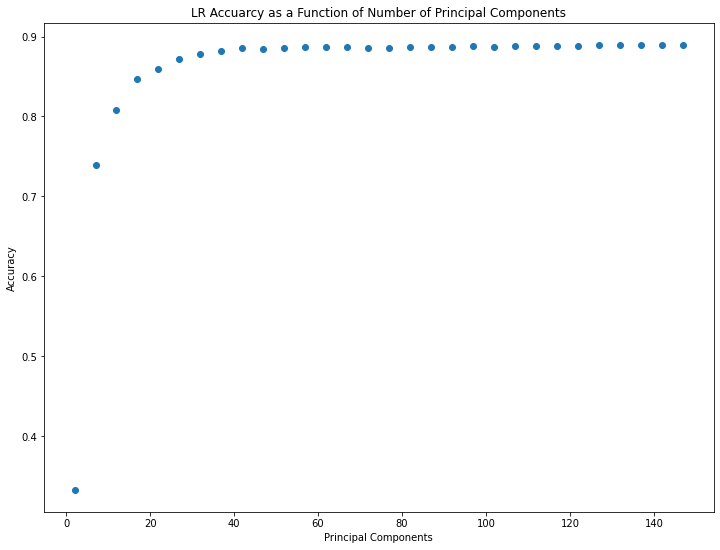

In [ ]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('LR Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

In [ ]:
pca

PCA(n_components=147)

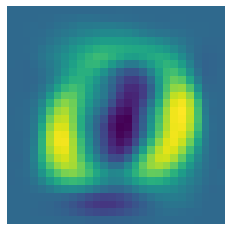

In [ ]:
def plot_component(pca, comp):
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.axis('off')
plot_component(pca, 0)

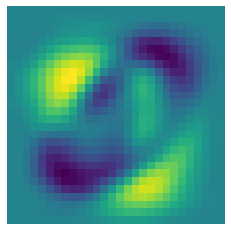

In [ ]:
plot_component(pca, 1)

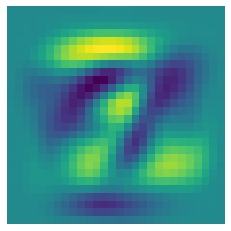

In [ ]:
plot_component(pca, 2)

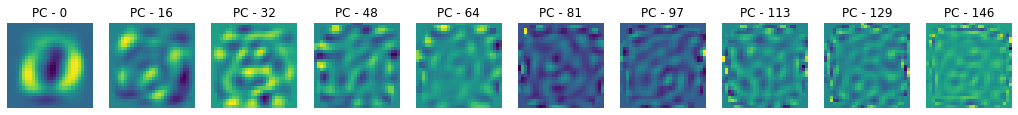

In [ ]:
fig,ax = plt.subplots(1,10, figsize=(18,17))
components_to_display = np.linspace(0,146, num=10, dtype=int)
for i,axis in enumerate(ax):
  comp = components_to_display[i]
  if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        axis.imshow(mat_data); #plot the data
        axis.axis('off')
        axis.set_title('PC - '+ str(comp))

array([  0,  16,  32,  48,  64,  81,  97, 113, 129, 146])

In [ ]:
print(len(pca_best.components_))
np.sqrt(len(pca_best.components_))

154


12.409673645990857

In [ ]:
X_train_pca_best = pca.fit_transform(X_train, y_train)
lr = LogisticRegression(solver='saga')
lr.fit(X_train_pca_best, y_train)
lr.score(X_train_pca_best, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.9218333333333333

In [ ]:
X_train_pca_best = pca.fit_transform(X_train, y_train)
lr = LogisticRegression(solver='saga')
lr.fit(X_train_pca_best[:5000], y_train[:5000])
lr.score(X_train_pca_best, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.8822166666666666

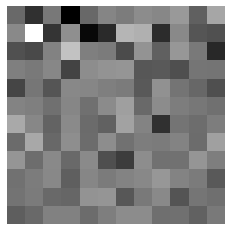

In [ ]:
pca, X_train_12px = do_pca(144, X_train)
digit = X_train_12px[0].reshape(12, 12)
plt.imshow(digit, cmap='binary_r', interpolation=None)
plt.axis('off')
plt.show();